### CNN 학습 main 코드

### 1. jpg to numpy

In [1]:
import glob
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

class_num = 10

train_files = glob.glob("4_dataset/1_train/*/*.jpg")
val_files = glob.glob("4_dataset/2_val/*/*.jpg")
test_files = glob.glob("4_dataset/3_test/*/*.jpg")

y_temp_train = []
y_temp_validation = []
y_temp_test = []

train_temp_files = []
val_temp_files = []
test_temp_files = []

for _file in train_files:
    train_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_train.append(int(_label[1][4]))

for _file in val_files:
    val_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_validation.append(int(_label[1][4]))    

for _file in test_files:
    test_temp_files.append(_file)
    _label = _file.split("\\")
    y_temp_test.append(int(_label[1][4]))  
    
image_width = 331
image_height = 221
channels = 3

x_train = np.ndarray(shape = (len(train_temp_files), image_width, image_height, channels), dtype = np.float32)
y_train = np.ndarray(shape = (len(y_temp_train), class_num), dtype = np.float32)
x_validation = np.ndarray(shape = (len(val_temp_files), image_width, image_height, channels), dtype = np.float32)
y_validation = np.ndarray(shape = (len(y_temp_validation), class_num), dtype = np.float32)
x_test = np.ndarray(shape = (len(test_temp_files), image_width, image_height, channels), dtype = np.float32)
y_test = np.ndarray(shape = (len(y_temp_test), class_num), dtype = np.float32)

Using TensorFlow backend.


In [2]:
def one_hot_encoding(num):
    arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(class_num):
        if (i==num):
            arr[i] = 1
        else:
            arr[i] = 0
    return arr

In [3]:
i = 0
for _file in train_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_train[i] = x
    y_train[i] = one_hot_encoding(y_temp_train[i])
    i += 1
print("Train data converting complete")

i = 0
for _file in val_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_validation[i] = x
    y_validation[i] = one_hot_encoding(y_temp_validation[i])
    i += 1
print("validation data converting complete")

i = 0
for _file in test_files:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    x = x.reshape((331, 221, 3))
    x = (x-128.0)/128.0
    x_test[i] = x
    y_test[i] = one_hot_encoding(y_temp_test[i])
    i += 1
print("test data converting complete")

Train data converting complete
validation data converting complete
test data converting complete


In [65]:
print("x_train : " + str(type(x_train)))
print("y_train : " + str(type(y_train)))
print("x_validation : " + str(type(x_validation)))
print("y_validation : " + str(type(y_validation)))
print("x_test : " + str(type(x_test)))
print("y_test : " + str(type(y_test)))

x_train : <class 'numpy.ndarray'>
y_train : <class 'numpy.ndarray'>
x_validation : <class 'numpy.ndarray'>
y_validation : <class 'numpy.ndarray'>
x_test : <class 'numpy.ndarray'>
y_test : <class 'numpy.ndarray'>


---

### 2. CNN with keras
* ref url
    * https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/
    * http://pythonstudy.xyz/python/article/402-numpy-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0
    * https://snowdeer.github.io/machine-learning/2018/01/10/convolution-neural-network/

#### <사용한 model 정보>
* model1 : SCM CM CM CM CM D(0.5) FDD, epoch = 15, batch_size = 50 - good - epoch 더 높여봐도 좋을 듯 & 오버피팅 있다
* model2 : SCM CM CM D(0.25) CM CM FDD, epoch = 15, batch_size = 50
* model3 : SCM CM CM D(0.5) CM D(0.5) CM FDD, epoch = 20, batch_size = 30
* model4 : SCM CM CM D(0.5) CM FDD, epoch = 25, batch_size = 30
* model5 : L2쓰니까 정답율이 너무 낮다! 다시 할 필요가 있다

In [4]:
from keras import layers
from keras import models
from keras import optimizers
import keras

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.regularizers import l1, l2

import matplotlib.pyplot as plt
import os
import numpy

In [5]:
model_num = 1

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(331, 221, 3))) # input size : 331, 221, 3
model.add(layers.MaxPool2D((2,2)))

#model.add(layers.Conv2D(64, (3, 3), activity_regularizer = l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

# model.add(Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(class_num, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 329, 219, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 164, 109, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 162, 107, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 81, 53, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 79, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 39, 25, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 39, 25, 128)       0         
__________

In [11]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [12]:
history = model.fit(x_train, y_train,
                    epochs=15, batch_size=50, 
                    validation_data=(x_validation, y_validation),
                    verbose=1)

Train on 4638 samples, validate on 1540 samples
Epoch 1/15
4638/4638 [==============================] - 177s 38ms/step - loss: 0.2896 - acc: 0.8967 - val_loss: 0.3298 - val_acc: 0.8947
Epoch 2/15
4638/4638 [==============================] - 177s 38ms/step - loss: 0.2433 - acc: 0.9071 - val_loss: 0.2869 - val_acc: 0.8967
Epoch 3/15
4638/4638 [==============================] - 178s 38ms/step - loss: 0.2172 - acc: 0.9164 - val_loss: 0.2480 - val_acc: 0.9065
Epoch 4/15
4638/4638 [==============================] - 178s 38ms/step - loss: 0.1893 - acc: 0.9266 - val_loss: 0.2758 - val_acc: 0.8908
Epoch 5/15
4638/4638 [==============================] - 179s 39ms/step - loss: 0.1686 - acc: 0.9356 - val_loss: 0.2360 - val_acc: 0.9090
Epoch 6/15
4638/4638 [==============================] - 178s 38ms/step - loss: 0.1507 - acc: 0.9420 - val_loss: 0.2151 - val_acc: 0.9203
Epoch 7/15
4638/4638 [==============================] - 178s 38ms/step - loss: 0.1367 - acc: 0.9498 - val_loss: 0.2148 - val_acc: 

In [13]:
model.save('5classSoundModel'+str(model_num)+'.h5')

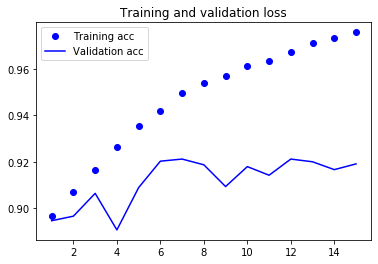

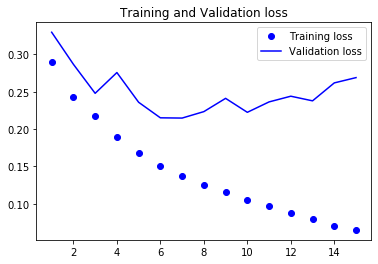

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("5classSoundModelGraph"+str(model_num)+"-1.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.savefig("5classSoundModelGraph"+str(model_num)+"-2.png")

plt.show()

---

### 3. 실제 test set에 대해 잘못된 판별 갯수 파악

In [15]:
import glob
from tqdm import tqdm_notebook
testList = glob.glob("4_dataset/3_test/*/*.jpg")
total = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
result = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print("Length : " + str(len(testList)))
for i in tqdm_notebook(range(len(testList))):
    predictNum = model.predict_classes(x_test[i:i+1, :], verbose = 0)
    _ArrRealNum = testList[i].split("\\")
    realNum = int(_ArrRealNum[1].split("fold")[-1])
    total[realNum] = total[realNum] + 1
    if(predictNum != realNum):
        result[realNum] = result[realNum] + 1
print("total : " , end = "")
print(total)
print("result : " , end = "")
print(result)
print("error% : ", end = "")
for i in range(10):
    temp = result[i] / total[i]
    temp = temp * 100
    print(round(temp, 3), end = ", ")

Length : 1542



total : [86, 136, 161, 31, 179, 199, 195, 193, 163, 199]
result : [17, 50, 77, 5, 47, 114, 92, 84, 86, 32]
error% : 19.767, 36.765, 47.826, 16.129, 26.257, 57.286, 47.179, 43.523, 52.761, 16.08, 

In [16]:
num = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in y_test:
    for j in range(10):
        if(int(i[j]) == 1):
            num[j] += 1
for i in range(1, 10):
    num[i] = num[i] + num[i-1]
print("0 to " + str(num[0]))
print(str(num[0]+1) + " to " + str(num[1]))
print(str(num[1]+1) + " to " + str(num[2]))
print(str(num[2]+1) + " to " + str(num[3]))
print(str(num[3]+1) + " to " + str(num[4]))
print(str(num[4]+1) + " to " + str(num[5]))
print(str(num[5]+1) + " to " + str(num[6]))
print(str(num[6]+1) + " to " + str(num[7]))
print(str(num[7]+1) + " to " + str(num[8]))
print(str(num[8]+1) + " to " + str(num[9]))

0 to 86
87 to 222
223 to 383
384 to 414
415 to 593
594 to 792
793 to 987
988 to 1180
1181 to 1343
1344 to 1542


In [17]:
num = 0
# 5~9 class는 back ground로 인식한다
for i in range(len(testList)):
    print(str(num), end = " : ")
    print(model.predict_classes(x_test[i:i+1, :], verbose = 0), end = " , ")
    if(i==31 or i == 62 or i == 93 or i == 124 or i == 155 or i == 186 or i == 217 or i == 248 or i == 279 or i == 310):
        print("\n===========================================================================")
        print("\n")
    num += 1

0 : [0] , 1 : [0] , 2 : [0] , 3 : [0] , 4 : [0] , 5 : [0] , 6 : [0] , 7 : [0] , 8 : [0] , 9 : [6] , 10 : [0] , 11 : [0] , 12 : [0] , 13 : [0] , 14 : [0] , 15 : [0] , 16 : [6] , 17 : [6] , 18 : [0] , 19 : [0] , 20 : [0] , 21 : [0] , 22 : [9] , 23 : [6] , 24 : [0] , 25 : [0] , 26 : [0] , 27 : [0] , 28 : [9] , 29 : [9] , 30 : [0] , 31 : [9] , 


32 : [0] , 33 : [9] , 34 : [9] , 35 : [0] , 36 : [9] , 37 : [0] , 38 : [0] , 39 : [0] , 40 : [0] , 41 : [0] , 42 : [0] , 43 : [0] , 44 : [0] , 45 : [0] , 46 : [0] , 47 : [0] , 48 : [0] , 49 : [0] , 50 : [0] , 51 : [0] , 52 : [0] , 53 : [0] , 54 : [0] , 55 : [0] , 56 : [0] , 57 : [0] , 58 : [0] , 59 : [0] , 60 : [0] , 61 : [1] , 62 : [9] , 


63 : [0] , 64 : [0] , 65 : [0] , 66 : [0] , 67 : [0] , 68 : [0] , 69 : [0] , 70 : [0] , 71 : [0] , 72 : [0] , 73 : [0] , 74 : [7] , 75 : [0] , 76 : [0] , 77 : [0] , 78 : [0] , 79 : [0] , 80 : [9] , 81 : [0] , 82 : [2] , 83 : [0] , 84 : [2] , 85 : [0] , 86 : [5] , 87 : [5] , 88 : [1] , 89 : [5] , 90 : [1] , 91 

311 : [5] , 312 : [5] , 313 : [8] , 314 : [2] , 315 : [2] , 316 : [9] , 317 : [2] , 318 : [6] , 319 : [2] , 320 : [1] , 321 : [8] , 322 : [2] , 323 : [2] , 324 : [2] , 325 : [2] , 326 : [2] , 327 : [2] , 328 : [2] , 329 : [2] , 330 : [2] , 331 : [2] , 332 : [2] , 333 : [2] , 334 : [2] , 335 : [2] , 336 : [2] , 337 : [2] , 338 : [2] , 339 : [2] , 340 : [2] , 341 : [2] , 342 : [2] , 343 : [2] , 344 : [2] , 345 : [2] , 346 : [2] , 347 : [2] , 348 : [2] , 349 : [2] , 350 : [5] , 351 : [2] , 352 : [2] , 353 : [2] , 354 : [2] , 355 : [2] , 356 : [2] , 357 : [2] , 358 : [2] , 359 : [2] , 360 : [2] , 361 : [2] , 362 : [2] , 363 : [2] , 364 : [2] , 365 : [6] , 366 : [2] , 367 : [2] , 368 : [2] , 369 : [2] , 370 : [2] , 371 : [2] , 372 : [5] , 373 : [2] , 374 : [2] , 375 : [2] , 376 : [2] , 377 : [2] , 378 : [2] , 379 : [9] , 380 : [5] , 381 : [2] , 382 : [2] , 383 : [3] , 384 : [3] , 385 : [6] , 386 : [3] , 387 : [3] , 388 : [3] , 389 : [3] , 390 : [3] , 391 : [3] , 392 : [3] , 393 : [3] , 394 

 , 994 : [7] , 995 : [7] , 996 : [7] , 997 : [7] , 998 : [7] , 999 : [7] , 1000 : [7] , 1001 : [7] , 1002 : [7] , 1003 : [7] , 1004 : [7] , 1005 : [7] , 1006 : [7] , 1007 : [7] , 1008 : [7] , 1009 : [7] , 1010 : [8] , 1011 : [8] , 1012 : [8] , 1013 : [9] , 1014 : [7] , 1015 : [7] , 1016 : [7] , 1017 : [7] , 1018 : [7] , 1019 : [9] , 1020 : [9] , 1021 : [9] , 1022 : [7] , 1023 : [9] , 1024 : [7] , 1025 : [7] , 1026 : [9] , 1027 : [9] , 1028 : [7] , 1029 : [7] , 1030 : [7] , 1031 : [6] , 1032 : [7] , 1033 : [7] , 1034 : [8] , 1035 : [8] , 1036 : [8] , 1037 : [8] , 1038 : [8] , 1039 : [7] , 1040 : [8] , 1041 : [8] , 1042 : [8] , 1043 : [8] , 1044 : [8] , 1045 : [8] , 1046 : [8] , 1047 : [8] , 1048 : [8] , 1049 : [8] , 1050 : [7] , 1051 : [8] , 1052 : [8] , 1053 : [8] , 1054 : [8] , 1055 : [8] , 1056 : [8] , 1057 : [8] , 1058 : [8] , 1059 : [8] , 1060 : [8] , 1061 : [7] , 1062 : [8] , 1063 : [8] , 1064 : [7] , 1065 : [7] , 1066 : [9] , 1067 : [7] , 1068 : [7] , 1069 : [7] , 1070 : [7] , 10